<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

## 1 Comparing the two ‘dialects’

### 1.1 Some nomenclature

In [3]:
import numpy as np
from matplotlib import pyplot as plt
#figure is the canvas, axis is the mathematical axis used for plotting

### 1.2 We need some data.

In [1]:

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### 1.3 Here comes the comparison

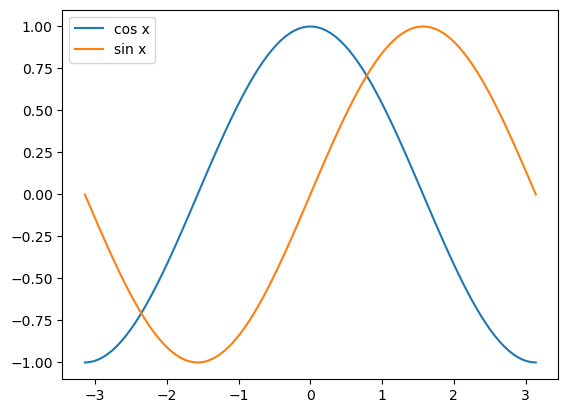

In [4]:

plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()
plt.show()


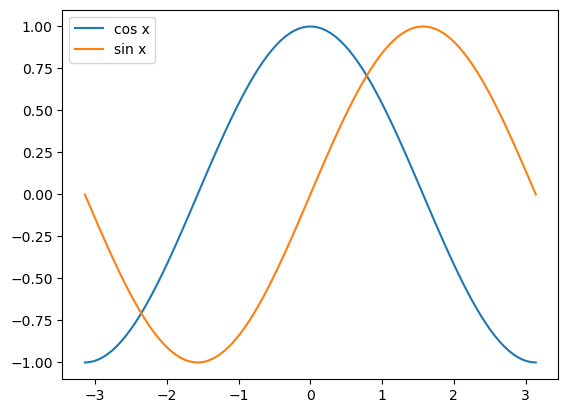

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()
plt.show()


## 2 Using the OO Interface

### 2.1 Getting ax

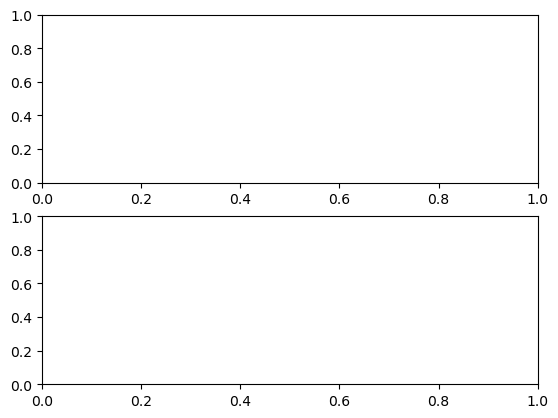

In [12]:

fig, ax = plt.subplots(ncols=1, nrows=2)

### 2.2 What is ax

In [7]:

type(ax)
#ax is numpy array
#ax has two things
#ax contains matplotlib axis

numpy.ndarray

### 2.3 Plots in a column

In [9]:

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

### 2.4 Legends

In [10]:

for a in ax:
    a.legend()
    a.grid(alpha=.25)

### 2.5 Tweaks

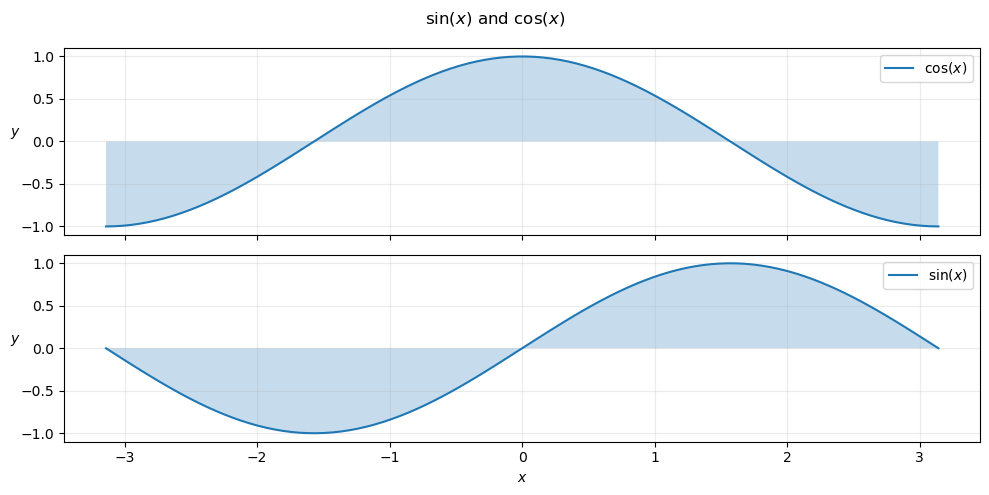

In [11]:

fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(10, 5),   # 10 x 5 inches!
                       sharex=True)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()

plt.show()

## 3 More rows and columns

### 3.1 Using ax

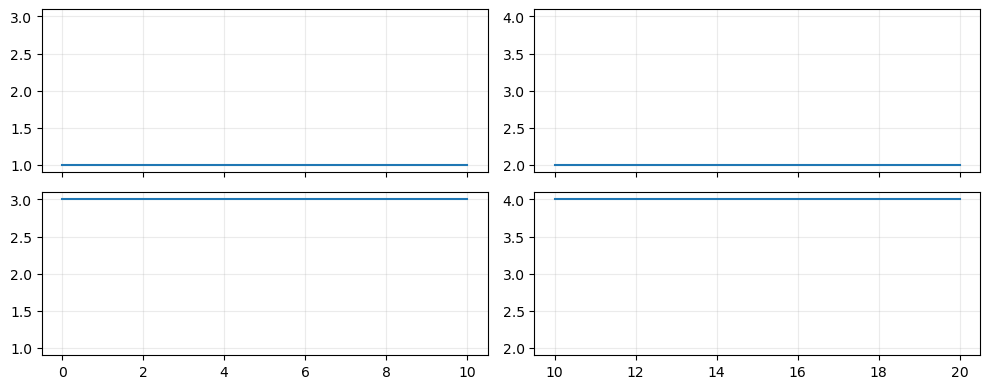

In [15]:

fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# x data for plotting
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(10, 20, 100)

top_left.plot(x1, np.ones_like(x1))
top_right.plot(x2, 2*np.ones_like(x2))
bottom_left.plot(x1, 3*np.ones_like(x1))
bottom_right.plot(x2, 4**np.ones_like(x2))

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()
plt.show()

In [14]:
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]


### 3.2 Sharing axes

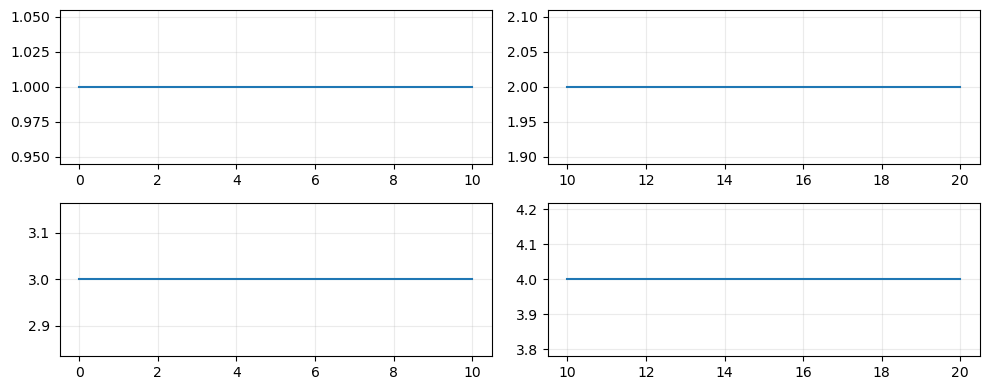

In [16]:

fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4))
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# x data for plotting
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(10, 20, 100)

top_left.plot(x1, np.ones_like(x1))
top_right.plot(x2, 2*np.ones_like(x2))
bottom_left.plot(x1, 3*np.ones_like(x1))
bottom_right.plot(x2, 4**np.ones_like(x2))

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()
plt.show()

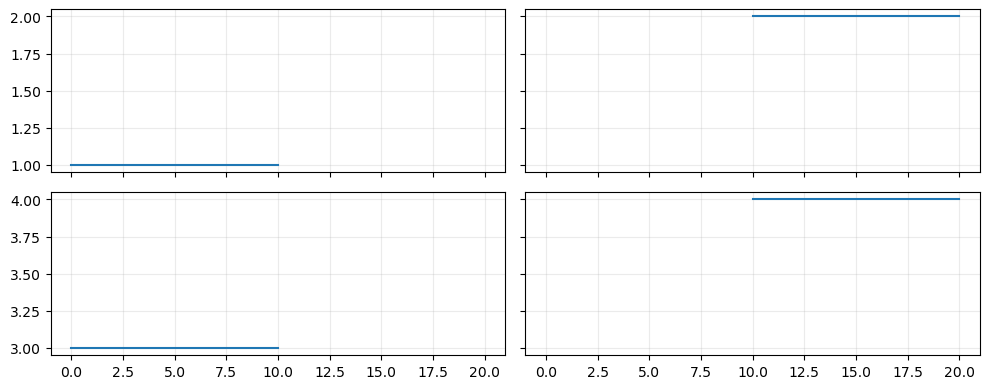

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4),
                       sharex=True, sharey='row')
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# x data for plotting
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(10, 20, 100)

top_left.plot(x1, np.ones_like(x1))
top_right.plot(x2, 2*np.ones_like(x2))
bottom_left.plot(x1, 3*np.ones_like(x1))
bottom_right.plot(x2, 4**np.ones_like(x2))

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()
plt.show()

### 3.3 Accessing all axes

In [18]:

for a in ax.flatten():
    a.grid(alpha=.25)

## 4 Other useful plots

### 4.1 Histograms

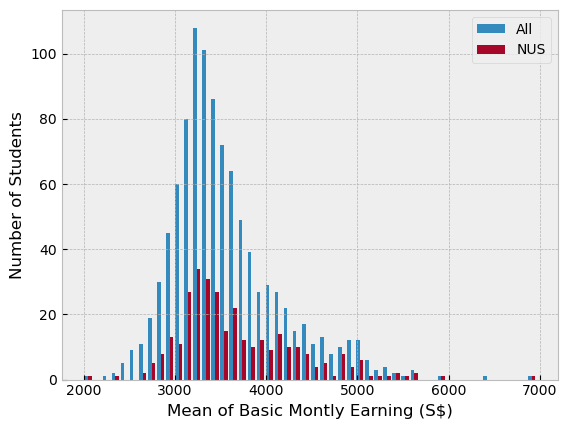

In [21]:

data = {}

filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.txt'
data['All'] = np.loadtxt(filename, skiprows=1)

filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.txt'
data['NUS'] = np.loadtxt(filename, skiprows=1)

plt.style.use('bmh')

plt.hist([data['All'], data['NUS']],
         bins=50,                        # How many bins to split the data
         label=['All', 'NUS']
         )
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

### 4.2 Scatter plots

C:\Users\hughc\AppData\Local\Temp\ipykernel_24572\224840038.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


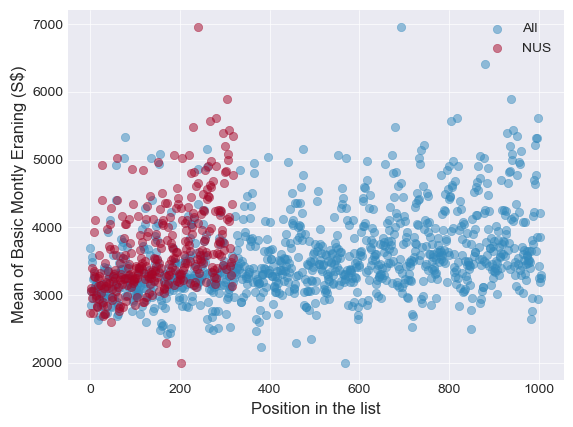

In [23]:

data = {}
for label in ['All', 'NUS']:
    filename = f'sg-gov-graduate-employment-survey_basic_monthly_mean_{label.lower()}.txt'
    data[label] = np.loadtxt(filename, skiprows=1)

plt.style.use('seaborn-darkgrid')

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()
plt.show()

### 4.3 Bar charts

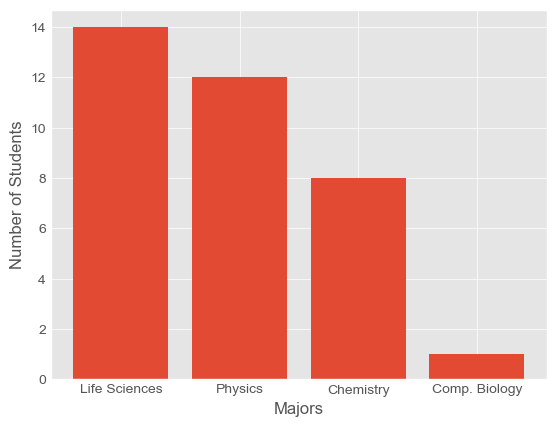

In [24]:

student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

plt.show()

### 4.4 Pie charts

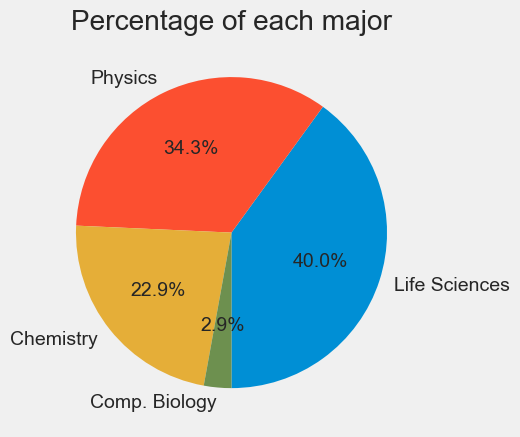

In [25]:

student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')
plt.show()

## Exercise 1 :  Plotting data from files

In [ ]:



# Your solution here


